# <div align='center'>第1章 数据描述性分析</div>
### 内容
 <div align='left'>                  
     <font size=4>
       1.1 描述统计量<br>
       1.2 数据的分布<br>
       1.3 概率分布函数的图形<br>
       1.4 直方图、经验分布与QQ图<br>
       1.5 多元数据的数据特征与相关性分析<br>
       1.6 多元数据的基本图形表示<br>
         </font>
       </div>

数据的统计分析分为统计描述和统计推断两部分。前者通过绘制统计图、编制统计表、计算统计量等方法表述数据的分布特征，是数据分析的基本步骤，也是统计推断的基础。其优点在于方便、直观，利于对数据特征的理解。

-------------------

## 1.1  描述统计量
   数据是信息的载体，从数据到信息，需要先分析数据的主要特征，这些特征包括数据的位置度量、分散程度度量、关系度量以及分布形状的度量

### 1.1.1 位置与分散程度的度量

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Source Han Serif SC']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
'''
示例：某学校15个学生体重（单位：公斤）抽样调查数据.
'''
weights = np.array([75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7,
                    63.5,66.6, 64.0, 57.0, 69.0, 56.9, 50.0, 72.])

# 1. 均值 (mean)
w_mean = np.mean(weights)
w_mean1 = weights.mean()
# 限定范围内的数据求均值（用以排除离群点），闭区间
limitedMean = st.tmean(weights,(60,70))
# sort：排序用的
sorted_weig = sorted(weights,reverse=True)  # reverse 的缺省值为 False

# 2. 中位数 (median)
#   重要的统计量，有时候比均值还重要；对称分布比如 t 分布和正态分布，均值与中位数很接近；
#                                偏态分布的二者相差比较大，比如 F 分布
median_weig = np.median(weights)

# 3. 分位数 (percentile)
quantiles = np.quantile(weights,[0.1,0.2,0.4,0.6,0.8,1])
print('学生体重的 [10%,20%,40%,60%,80%,100%] 分位数：', quantiles)

# 4. 方差 (variance)
#   表示数据离散程度大小。（与均值相差多少）
v = np.var(weights)  # 有偏估计（总体方差），除以 n
v_unb = st.tvar(weights)  # 无偏估计（样本方差， unbiased），除以 (n-1)
print('体重数据方差的估计为：%0.2f,无偏估计为：%0.2f' % (v, v_unb))

# 5. 标准差 (Standard Deviation)
s = np.std(weights)  # 有偏估计
s_unb = st.tstd(weights)  # 无偏估计
print('体重数据标准差的估计为：%0.2f,无偏估计为：%0.2f' % (s, s_unb))

# 6. 变异系数 (Coefficient of Variation)
#   在消除尺度和量纲影响的情况下观测数据离散程度，用百分数表示
#   无偏标准差 / 均值 * 100%
cv = s_unb / w_mean * 100
print('体重数据的变异系数为：', np.round(cv, 2),'%')

# 7. 极差 (Range, 全距)
R_weights = np.max(weights) - np.min(weights)
print('体重数据的极差：%0.2f' % R_weights)

# 8. 标准误 (Standard Error of the Mean, SEM):
#   描述抽样样本的均值之间的离散程度，衡量样本均值与总体均值间的差距（样本均值间的变异）。
#   如: 对总体进行 10 次抽样，每次抽样 5 个，每次抽样得到平均值 Avg_i，共 10 个平均值
#       对这 10 个平均值计算标准差，得到总体的标准误。
#   一般情况下，使用 单次抽样标准差 / √抽样数 约等为真实的标准误
sm_weights = st.tstd(weights) / np.sqrt(len(weights))
print('体重数据的标准误：%0.2f' % sm_weights)

学生体重的 [10%,20%,40%,60%,80%,100%] 分位数： [52.76 56.98 62.2  64.   67.32 75.  ]
体重数据方差的估计为：52.71,无偏估计为：56.47
体重数据标准差的估计为：7.26,无偏估计为：7.51
体重数据的变异系数为： 12.05 %
体重数据的极差：27.60
体重数据的标准误：1.94


In [3]:
#身高
x1=np.array([148, 139, 160, 149, 159, 142, 153, 150, 151, 139, 
        140, 161, 158, 140, 137, 152, 149, 145, 160, 156, 
        151, 147, 157, 147, 157, 151, 144, 141, 139, 148]) 
#体重
x2=np.array([41, 34, 49, 36, 45, 31, 43, 43, 42, 31, 
        29, 47, 49, 33, 31, 35, 47, 35, 47, 44,
        42, 38, 39, 30, 48, 36, 36, 30, 32, 38])
#胸围
x3=np.array([72, 71, 77, 67, 80, 66, 76, 77, 77, 68, 
        64, 78, 78, 67, 66, 73, 82, 70, 74, 78, 
        73, 73, 68, 65, 80, 74, 68, 67, 68, 70])
#坐高
x4=np.array([78, 76, 86, 79, 86, 76, 83, 79, 80, 74, 
        74, 84, 83, 77, 73, 79, 79, 77, 87, 85, 
        82, 78, 80, 75, 88, 80, 76, 76, 73, 78])

#将x1,x2,x3,x4四个向量合并存储为矩阵，并转置为列向量，.T操作符（或属性）是对矩阵进行转置。
stu_data = np.matrix([x1,x2,x3,x4]).T 
print('学生的身高、体重、胸围和坐高（前五个）：\n',stu_data[0:5])

stu_mean = np.round(stu_data.mean(0),1).ravel()#将二维矩阵展平为一维向量,数据类型转变为Numpy数组
print('\n学生的平均身高、平均体重、平均胸围和平均坐高分别为：\n %.1f, %.1f, %.1f, %.1f,' 
      %(stu_mean[0],stu_mean[1],stu_mean[2],stu_mean[3]))

学生的身高、体重、胸围和坐高（前五个）：
 [[148  41  72  78]
 [139  34  71  76]
 [160  49  77  86]
 [149  36  67  79]
 [159  45  80  86]]

学生的平均身高、平均体重、平均胸围和平均坐高分别为：
 149.0, 38.7, 72.2, 79.4,


### 1.1.2 关系度量


In [4]:
'''
求四个向量之间的方差-协方差矩阵时，需要对矩阵进行转置，将列向量转换成行向量。
求相关系数矩阵时同样也要进行转置，相关系数矩阵是协方差矩阵进行标准化转换之后的结果。
'''
###协方差矩阵：covariance
cov_stu = np.cov(stu_data.T)#方差-协方差矩阵
### 相关系数矩阵：correlation coefficient
rou_stu = np.corrcoef(stu_data.T)

#四个随机向量之间的相关程度很高，尤其是身高与坐高之间的相关性最高（0.92）。
print('学生身高、体重、胸围和坐高之间的协方差与相关系数矩阵分别如下：\n\n',np.round(cov_stu,2), '\n\n',np.round(rou_stu,2))

学生身高、体重、胸围和坐高之间的协方差与相关系数矩阵分别如下：

 [[53.52 40.79 27.59 28.76]
 [40.79 41.73 29.83 24.36]
 [27.59 29.83 26.53 17.22]
 [28.76 24.36 17.22 18.24]] 

 [[1.   0.86 0.73 0.92]
 [0.86 1.   0.9  0.88]
 [0.73 0.9  1.   0.78]
 [0.92 0.88 0.78 1.  ]]


### 1.1.3 分布形状的度量


In [5]:
''' 偏度计算：
（1）偏度表示曲线是向左偏或右偏，又称为负偏态或正偏态。
（2）偏度越接近0，越符合正态分布的曲线。
（3）偏度小于0称分布具有负偏离，也称左偏态；反之就是正偏态或右偏态。
'''
###偏度计算公式
n = len(weights)
#三阶矩，其他各阶矩的计算依次类推
u3 = np.sum((weights-w_mean)**3)/n

###使用使用总体标准差的无偏估计，计算的偏度是修正后偏度
skew1 = ((n**2)*u3)/((n-1)*(n-2)*(s_unb**3))

###pandas计算是修正后偏度
pd_weights = pd.Series(weights)
skew_pandas = pd_weights.skew()
print('Pandas计算公式手工计算以及调用函数计算结果：')
print('skew1:',skew1,'skew_pandas:',skew_pandas)


###无修正偏度的手工计算，使用样本标准差
skew2 = np.sum((weights-w_mean)**3)/((s**3)*n)

###scipy计算公式和结果
print('\nScipy计算公式手工计算以及调用函数计算结果（无修正）：')
skew_scipy = st.skew(weights)
print('skew2:',skew2,'skew_scipy:',skew_scipy)

'''
(1)使用Scipy的skew函数，如果将第二个参数bias设为False，计算结果就和Pandas完全相同了。
   bias参数表示是否修正，如果为False表示修正，反之则不修正。
(2)总体上感觉修正后偏度比较准确，但是很多场合仍用无修正的偏度进行统计量的计算。
(3)StatsModels的线性回归模型对残差的正态分布性（Jarque-Bera、Omnibus检验等）
   进行检验时，使用的偏度就是无修正的，包括峰度也是无修正的。
'''
skew_scipy_bias = st.skew(weights,bias=False)
print('\nScipy进行修正后的偏度：',skew_scipy_bias)

Pandas计算公式手工计算以及调用函数计算结果：
skew1: -0.4299560852122288 skew_pandas: -0.429956085212229

Scipy计算公式手工计算以及调用函数计算结果（无修正）：
skew2: -0.38570725236501335 skew_scipy: -0.38570725236501346

Scipy进行修正后的偏度： -0.429956085212229


In [6]:
''' 峰度的计算：
（1）峰度表示曲线是扁平态（低峰态）还是尖峰态。
（2）正常值有两种定义：Fisher定义该值为0；Pearson定义为3。
（3）按照Fisher定义，峰度=0表示正好符合正态分布的曲线；大于0表示峰比较尖，反之表示比较平。
'''
###峰度计算，StatsModels多使用无修正的峰度
#手工实现留作练习
kurt_pandas = pd_weights.kurt()
kurt_scipy = st.kurtosis(weights,bias=False)
kurt_scipy_bias = st.kurtosis(weights,bias=True)#True是bias的缺省值
print('\nPandas计算峰度:',kurt_pandas,'\n\nScipy计算峰度（修正后）:',
      kurt_scipy,'\n\nScipy计算峰度（无修正）:',kurt_scipy_bias)


Pandas计算峰度: 0.09653947135209195 

Scipy计算峰度（修正后）: 0.09653947135209329 

Scipy计算峰度（无修正）: -0.3077671538797926


### 1.1.4 数据特性的总括

In [7]:

print('学生体重数据的总括描述：',st.describe(weights,bias=False))


print('\n学生体重数据的正态性检验：',st.shapiro(weights))
print('\n测试不服从正态分布的数据：',st.shapiro([1,2,3,4,900]))#p值远小于0.05，拒绝原假设


#生成服从f分布，自由度为(2,9)的随机数据
f_data = st.f.rvs(size = 50,dfn=2,dfd=9)
#检验上述数据是否服从自由度为3的t分布，结果很显然拒绝服从该分布的原假设。
print('\n检验数据是否服从某种分布：',st.kstest(f_data,'t',(3,)))#(3,)表示t分布的自由度
print('\n检验数据是否服从某种分布：',st.kstest(f_data,'f',(2,9)))#接受原假设服从自由度为2,9的f分布

学生体重数据的总括描述： DescribeResult(nobs=15, minmax=(47.4, 75.0), mean=62.36, variance=56.47257142857143, skewness=-0.429956085212229, kurtosis=0.09653947135209329)

学生体重数据的正态性检验： ShapiroResult(statistic=0.9686217904090881, pvalue=0.8371438980102539)

测试不服从正态分布的数据： ShapiroResult(statistic=0.5549201965332031, pvalue=0.0001440312626073137)

检验数据是否服从某种分布： KstestResult(statistic=0.5033533227748321, pvalue=2.98975822300544e-12, statistic_location=0.009123550835133018, statistic_sign=-1)

检验数据是否服从某种分布： KstestResult(statistic=0.09117882554034651, pvalue=0.7659827786594483, statistic_location=1.1086803971758383, statistic_sign=1)


-------------------

## 1.2  数据的分布


### 1.2.2 常见离散型分布



- #### 示例：
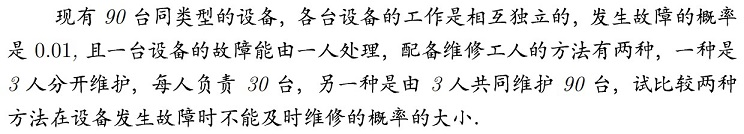

In [8]:

#3人分别负责30台发生故障不能修理的概率
p30=st.binom.sf(k=1,p=0.01,n=30)*3
#3人共同负责90台发生故障不能修理的概率
p90=st.binom.sf(k=3,p=0.01,n=90)
print('p30 =',p30,'，p90 =',p90)
print('3人共同维护90台机器时,发生故障不能及时修理的概率更小。')

p30 = 0.10844399493672194 ，p90 = 0.012940166077704174
3人共同维护90台机器时,发生故障不能及时修理的概率更小。


In [9]:

###下面两种计算方式的效果相同,pmf函数计算离散型随机变量的概率质量函数。
p30_1=(1-(st.binom.pmf(k=0,p=0.01,n=30)+st.binom.pmf(k=1,p=0.01,n=30)))*3
#cdf计算累积分布函数的值
p30_2=(1-st.binom.cdf(k=1,p=0.01,n=30))*3
p30_1,p30_2

(0.10844399493672241, 0.10844399493672208)

- #### Poisson（泊松）分布

- #### 示例：
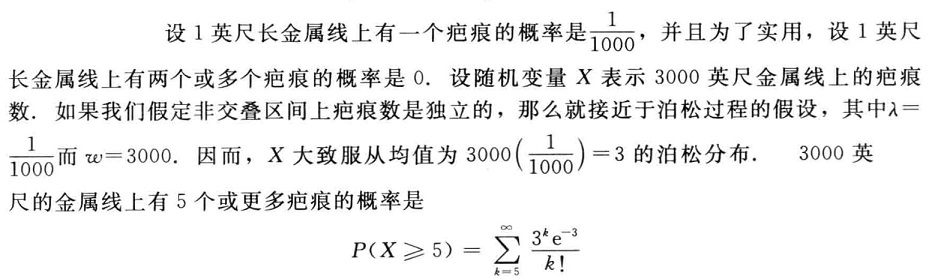

In [10]:

###通过累积分布函数间接求解

#mu表示均值，本例中等于3，下同。
p4=st.poisson.cdf(k=4,mu=3)
p5=1-p4
print('3000英尺的金属线上有5个及以上疤痕的概率是(通过累积分布函数)：',np.round(p5,3))

###通过生存函数直接求解
#注意这里的k不是5而是4。
p5_1=st.poisson.sf(k=4,mu=3)
print('\n3000英尺的金属线上有5个及以上疤痕的概率是(通过生存函数)：',np.round(p5_1,3))

3000英尺的金属线上有5个及以上疤痕的概率是(通过累积分布函数)： 0.185

3000英尺的金属线上有5个及以上疤痕的概率是(通过生存函数)： 0.185


### 1.2.3 常见连续型分布 

- #### 正态分布



正态分布概率密度函数曲线(均值:1，标准差:0.5)：


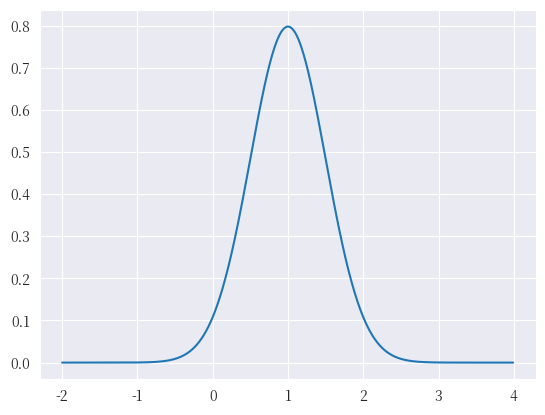


手工计算分布函数的值： 0.8413447460685428

Scipy函数计算正态分布的累积分布函数的值： 0.8413447460685429

服从正态分布的随机数生成： [1.32671788 0.66946643 0.76931058 0.6754162  0.74776951]

概率密度函数(显示前10个)： [0.0175283  0.01797113 0.01842331 0.01888498 0.01935628 0.01983735
 0.02032836 0.02082943 0.02134071 0.02186237]

生存函数： 0.15865525393145707

分位数函数： 1.4972289416048765

置信度0.95的置信区间： (0.020018007729972975, 1.979981992270027)


In [11]:
import scipy.integrate as integ

#构建服从正态分布的概率密度函数的值，均值mu为1，标准差sigma为0.5
x = np.arange(-2,4,0.01)
#根据x计算正态分布的概率密度函数
n_density = (1/(((2*np.pi)**0.5)*0.5))*np.exp((-(x-1)**2)/(2*(0.5**2)))#第1个公式f(x)
#正态分布的密度函数曲线，后面还有更具体的图形例子
print('正态分布概率密度函数曲线(均值:1，标准差:0.5)：')
plt.plot(x,n_density)
plt.show()

#累积分布函数的计算,设x0=1.5，则F(x0)=P(x<1.5)
#即求概率密度函数f(x)在(-Inf,1.5]区间的积分
def nf(x,mu,sigma):
    return (1/(((2*np.pi)**(0.5))*sigma))*np.exp((-(x-mu)**2)/(2*(sigma**2)))

#累积分布函数是对概率密度函数求积分（针对连续型随机变量，离散型随机变量是求和）
n_distrib = integ.quad(nf,float('-Inf'),1.5,args=(1,0.5))[0]#第二个公式F(x)的实现
print('\n手工计算分布函数的值：', n_distrib)


#直接调用Scipy的累积分布函数
n_distrib_scipy = st.norm.cdf(1.5,1,0.5)
print('\nScipy函数计算正态分布的累积分布函数的值：', n_distrib_scipy)

#Scipy有关概率分布的其他应用
print('\n服从正态分布的随机数生成：',st.norm.rvs(1,0.5,5))


print('\n概率密度函数(显示前10个)：',st.norm.pdf(x,0.5,1)[0:10])
print('\n生存函数：',st.norm.sf(1.5,1,0.5))# sf=1-cdf
print('\n分位数函数：',st.norm.ppf(0.84,1,0.5))#注意：通常都是通过下分位数（下尾）计算分位数。

#该分布下随机变量有95%的可能性位于该区间
print('\n置信度0.95的置信区间：',st.norm.interval(0.95,1,0.5))

- #### t分布


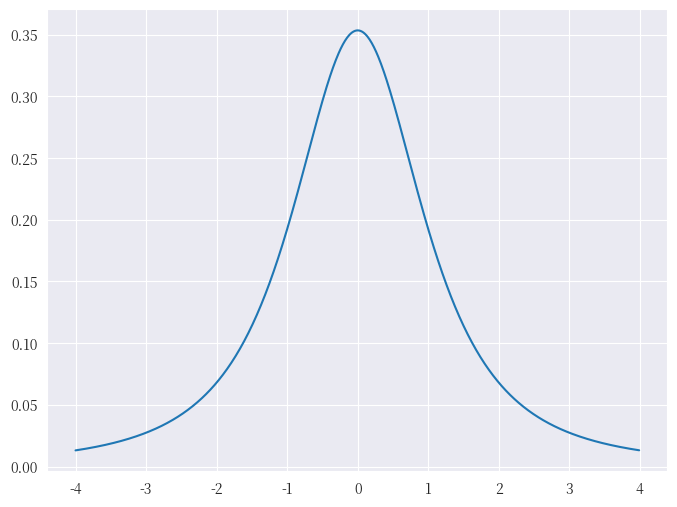

t分布概率密度函数的值(x0=2,df=2)： 0.06804138174397717

t分布在x0=1.5处的累积分布函数值： 0.863803437554497

使用Scipy计算概率密度函数值： 0.06804138174397716

使用Scipy计算累积分布函数值： 0.8638034375544996


In [12]:
import scipy.special as ss
#t分布的概率密度函数
def tf(x,d):
    return  ss.gamma((d+1)/2)*((1+(x**2)/d)**(-(d+1)/2))/((d*np.pi)**0.5*ss.gamma(d/2))
d=2
x = np.arange(-4,4,0.01)
t = ss.gamma((d+1)/2)*((1+(x**2)/d)**(-(d+1)/2))/((d*np.pi)**0.5*ss.gamma(d/2))
plt.figure(figsize=(8,6))
plt.plot(x,t)
plt.show()

#手工计算的概率密度函数和分布函数的值。
print('t分布概率密度函数的值(x0=2,df=2)：',tf(2,2))
#求概率密度函数的积分即可求出分布函数的值。
print('\nt分布在x0=1.5处的累积分布函数值：',integ.quad(tf,float('-Inf'),1.5,args=(2))[0])

#通过Scipy函数计算二者的值，其他函数的调用和前面正态分布类似，只不过t多了一个自由度参数。
print('\n使用Scipy计算概率密度函数值：',st.t.pdf(2,2))
print('\n使用Scipy计算累积分布函数值：',st.t.cdf(1.5,2))

- #### 伽马分布的计算


In [13]:

x,a=3,2
gamma_pdf=x**(a-1)*np.exp(-3)/ss.gamma(2)
###比较手工计算与stats包gamma分布的pdf函数计算的值
#二者相等。后面一个值是调用pdf函数计算的
gamma_pdf,st.gamma.pdf(3,2)

(0.14936120510359183, 0.14936120510359185)

In [14]:
###a=3,b=4,x=0.1
0.1**2*0.9**3/ss.beta(3,4),st.beta.pdf(0.1,3,4)

(0.4374000000000001, 0.4373999999999995)

- #### Scipy各种概率分布对应表：<br>
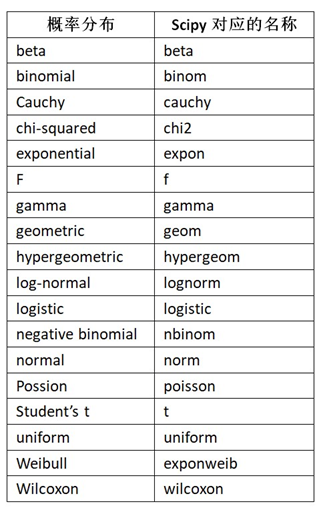

-------------------

## 1.3  概率分布函数的图形
常用分布函数在上表列出。<br>
此处以正态分布、F分布和卡方分布为例，使用python绘制各自的概率密度函数曲线。

### 1.3.1 正态分布的图形

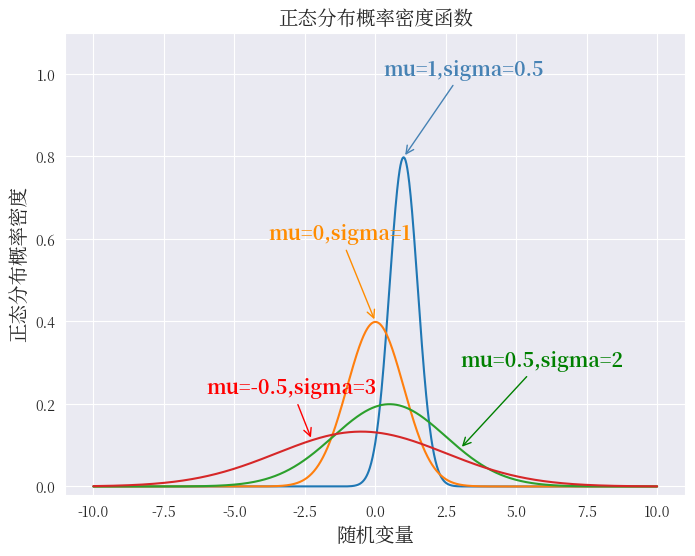

In [15]:
'''
正态分布的概率密度函数图形，根据不同的均值和标准差绘制曲线
'''

plt.figure(figsize=(8,6))
x = np.arange(-10.,10.,0.01)
y = st.norm.pdf(x,1.0,0.5)
plt.annotate("mu=1,sigma=0.5",xy=(1.0,st.norm.pdf(1.0,1.0,0.5)),
             xytext=(0.3,st.norm.pdf(1.0,1.0,0.5)+0.2),
             weight="bold",color='steelblue',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color="steelblue"))
y1 = st.norm.pdf(x,0.0,1.0)
plt.annotate("mu=0,sigma=1",xy=(0.0,st.norm.pdf(0.0,0.0,1.0)),
             xytext=(-3.8,st.norm.pdf(0.0,0.0,1.0)+0.2),
             weight="bold",color='darkorange',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))
y2 = st.norm.pdf(x,0.5,2.0)
plt.annotate("mu=0.5,sigma=2",xy=(3.0,st.norm.pdf(3.0,0.5,2.0)),
             xytext=(3.0,st.norm.pdf(3.0,0.5,2.0)+0.2),
             weight="bold",color='g',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))
y3 = st.norm.pdf(x,-0.5,3.0)
plt.annotate("mu=-0.5,sigma=3",xy=(-2.25,st.norm.pdf(-2.25,-0.5,3.0)),
             xytext=(-6,st.norm.pdf(-6,-0.5,3.0)+0.2),
             weight="bold",color='r',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("正态分布概率密度函数",size=14)
plt.xlabel("随机变量",size=14)
plt.ylabel("正态分布概率密度",size=14)
plt.ylim(-0.02,1.1)
plt.show()

### 1.3.2  $\chi^2$卡方分布的图形
卡方分布的概率密度函数在t分布中已经给出

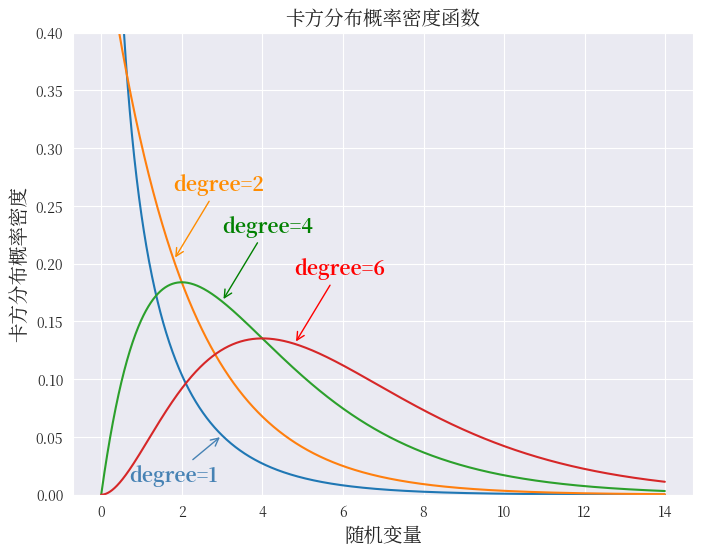

In [16]:
'''
卡方分布不同自由度的概率密度函数图形
'''
###生成模拟数据
x = np.arange(0.,14.,0.01)
#自由度(degree=1)的卡方分布随机数概率密度函数
y = st.chi2.pdf(x,1)
###annotate函数设置指向概率密度函数曲线的箭头和文字
plt.figure(figsize=(8,6))
plt.annotate("degree=1",xy=(3,st.chi2.pdf(3,1)),
             xytext=(0.7,st.chi2.pdf(3,1)-0.04),weight="bold",color='steelblue',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="steelblue"))

#生成另一个模拟数据，下面几行代码同样功能。
y1 = st.chi2.pdf(x,2)
plt.annotate("degree=2",xy=(1.8,st.chi2.pdf(1.8,2)),
             xytext=(1.8,st.chi2.pdf(1.8,2)+0.06),weight="bold",color='darkorange',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))
y2 = st.chi2.pdf(x,4)
plt.annotate("degree=4",xy=(3,st.chi2.pdf(3,4)),
             xytext=(3,st.chi2.pdf(3,4)+0.06),weight="bold",color='g',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))
y3 = st.chi2.pdf(x,6)
plt.annotate("degree=6",xy=(4.8,st.chi2.pdf(4.8,6)),
             xytext=(4.8,st.chi2.pdf(4.8,6)+0.06),weight="bold",color='r',fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("卡方分布概率密度函数",size=14)
plt.xlabel("随机变量",size=14)
plt.ylabel("卡方分布概率密度",size=14)
plt.ylim(0.,0.4)
plt.show()

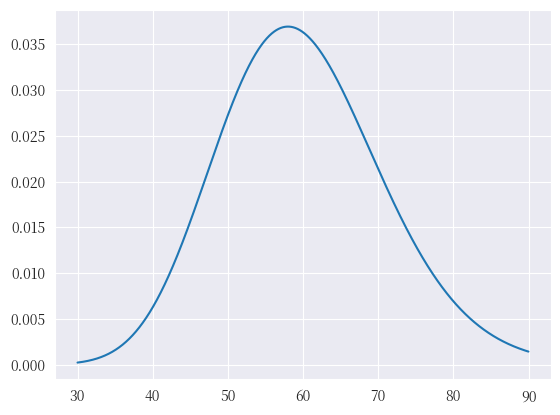

In [17]:
###卡方分布的自由度极端高的曲线，这种情况极少见。
#当自由度趋近无穷时，卡方分布渐进服从正态分布，但是存在争议。
#见：https://www.zhihu.com/question/363857851
x = np.arange(30.,90.,0.01)#随机数
y5 = st.chi2.pdf(x,60)
plt.plot(x,y5)#曲线和正态分布钟形很相似
plt.show()

### 1.3.3 F分布的图形



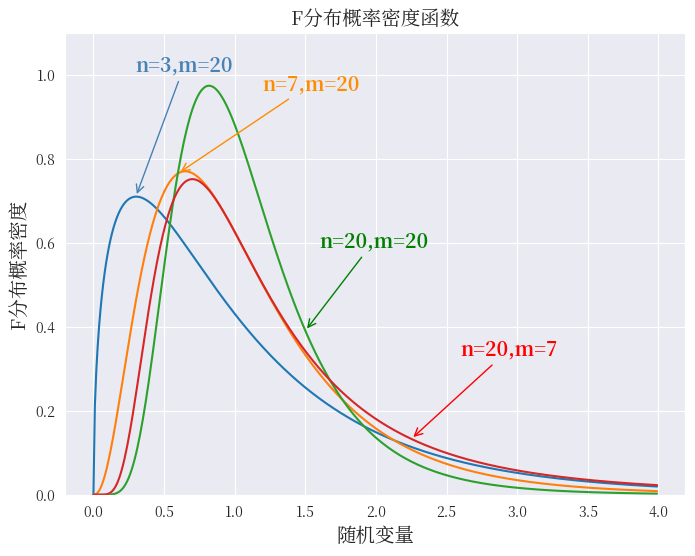

In [18]:
'''
F分布不同自由度的概率密度函数图形
'''

plt.figure(figsize=(8,6))
#生成模拟数据
x = np.arange(0.,4.,0.01)#随机数
y = st.f.pdf(x,3,20)#自由度为(3,20)的F分布随机数概率密度函数

#annotate函数设置指向概率密度函数曲线的箭头和文字
plt.annotate("n=3,m=20",xy=(0.3,st.f.pdf(0.3,3,20)),
             xytext=(0.3,st.f.pdf(.3,3,20)+0.3),weight="bold",color='steelblue',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="steelblue"))
#生成另一个模拟数据，下面几行代码同样功能。
y1 = st.f.pdf(x,7,20)
plt.annotate("n=7,m=20",xy=(0.6,st.f.pdf(0.6,7,20)),
             xytext=(1.2,st.f.pdf(.6,7,20)+0.2),weight="bold",color='darkorange',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="darkorange"))
y2 = st.f.pdf(x,20,20)
plt.annotate("n=20,m=20",xy=(1.5,st.f.pdf(1.5,20,20)),
             xytext=(1.6,st.f.pdf(1.5,20,20)+0.2),weight="bold",color='g',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="g"))
y3 = st.f.pdf(x,20,7)
plt.annotate("n=20,m=7",xy=(2.25,st.f.pdf(2.25,20,7)),
             xytext=(2.6,st.f.pdf(2.25,20,7)+0.2),weight="bold",color='r',
             fontsize=14,
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="r"))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title("F分布概率密度函数",size=14)
plt.xlabel("随机变量",size=14)
plt.ylabel("F分布概率密度",size=14)
plt.ylim(0.,1.1)
plt.show()

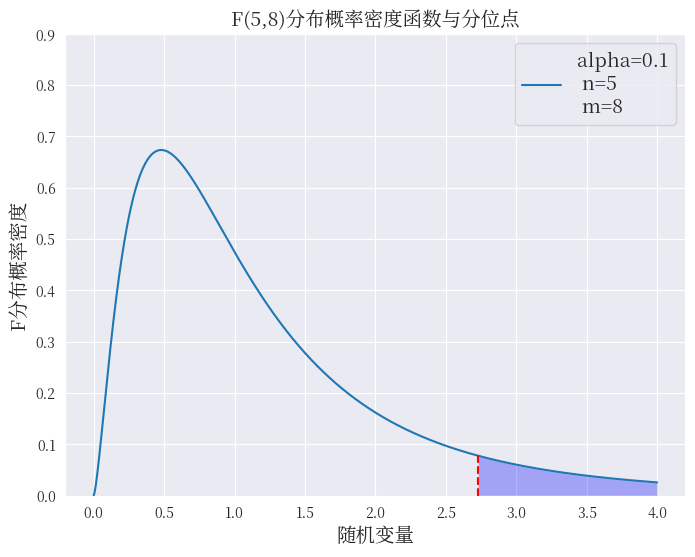

In [19]:
'''
F分布的分位点填充图形
'''
x = np.arange(0.,4.,0.001)
y = st.f.pdf(x,5,8)
plt.figure(figsize=(8,6))
plt.plot(x,y,label="alpha=0.1\n n=5 \n m=8")
plt.title("F(5,8)分布概率密度函数与分位点",size=14)
plt.xlabel("随机变量",size=14)
plt.ylabel("F分布概率密度",size=14)
plt.ylim(0.,0.9)
x1 = st.f.ppf(0.9,5,8)#注意：scipy的ppf函数时通过下分位来求分位数的
x2 = x[np.where(x>x1)]
#axvline函数画垂直线
plt.axvline(x=x1,ymax=st.f.pdf(x1,5,8)+0.01,ls="--",c="red")#添加垂直直线
#fill_between填充分布函数分位点的颜色，上0.1分位数对应的概率填充图
plt.fill_between(x2,y[np.where(x>x1)],0,facecolor="blue",alpha=0.3)
plt.legend(fontsize=14)
plt.show()

----------------------------

## 1.4  直方图、经验分布函数与QQ图

### 1.4.1 直方图与核密度估计


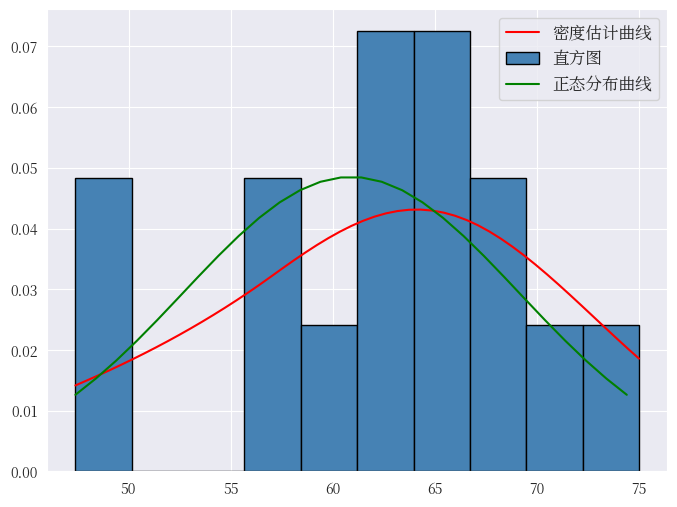

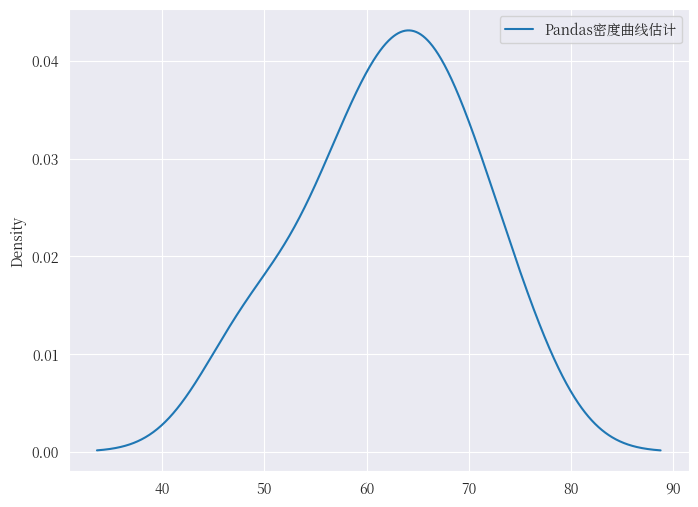

In [20]:
'''
数据的直方图、核密度估计曲线
'''
from scipy.interpolate import interp1d
import matplotlib.mlab as mlab  
#数据去重
weight_set = np.array(list(set(weights)))

#生成高斯核密度估计
kd = st.gaussian_kde(weight_set)
#dens = kd.evaluate(weight_set)
#通过高斯核密度估计计算概率密度
dens = kd.pdf(weight_set)
 # 插值法，50表示插值个数，个数>=实际数据个数，一般来说插值个数越多，曲线越平滑
x_new = np.linspace(min(weight_set),max(weight_set),50)  
#生成插值：'cubic'表示三次样条插值（Cubic Spline Interpolation）
f = interp1d(weight_set,dens, kind='cubic')
y_new = f(x_new)
#画出密度估计曲线
plt.figure(figsize=(8,6))
plt.plot(x_new,y_new,color='r',label="密度估计曲线")

#绘制直方图
plt.hist(weights,color='steelblue',density=True,label="直方图",edgecolor='k')

#根据体重数据的最大、最小值生成该范围内的正态分布密度函数值
x_norm = np.arange(np.min(weight_set),np.max(weight_set),1)
plt.plot(x_norm,st.norm.pdf(x_norm,np.mean(x_norm),st.tstd(x_norm)),
         color='g',label="正态分布曲线")

plt.legend(fontsize=12)
plt.show()

#使用Pandas计算密度估计曲线，效果也很好。
dx = pd.Series(weight_set)
plt.figure(figsize=(8,6))
dx.plot(kind='kde',label="Pandas密度曲线估计")
plt.legend()
plt.show()

### 1.4.2 经验分布函数


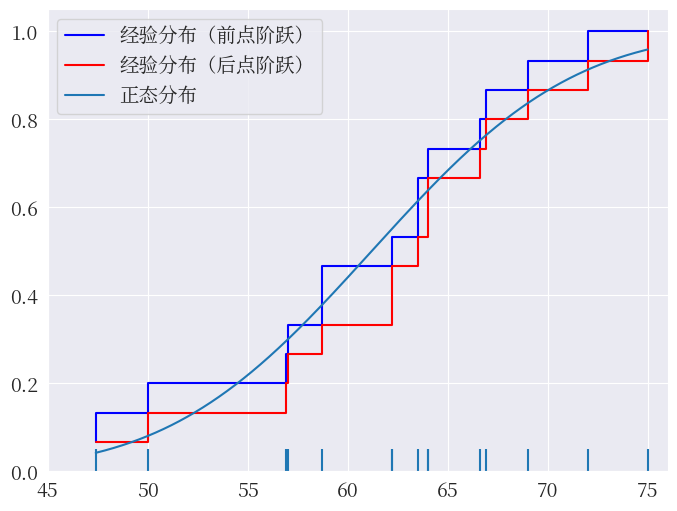

In [21]:
'''经验分布
'''
import statsmodels.distributions.empirical_distribution as em

# 仍是用前面的体重数据
x = np.array([75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7,
              63.5, 66.6, 64.0, 57.0, 69.0, 56.9, 50.0, 72.])

# 使用 StatsModels 的经验分布函数 ECDF 估计总体分布函数。
ecdf = em.ECDF(x)
x.sort()  # 对于x进行排序，由小到大
F = ecdf(x)  # 跳跃函数

# 使用 matplotlib 的 step 函数绘制经验分布函数曲线
plt.figure(figsize=(8,6))
plt.step(x, F, color='b', where='pre', label="经验分布（前点阶跃）")
plt.step(x, F, color='r', where='post', label="经验分布（后点阶跃）")
plt.xlim(45, 76)  # 设置x轴的范围
plt.ylim(0, 1.05)  # 设置y轴的范围
plt.vlines(x, 0, .05)  # 绘制垂直线

"""依据体重数据拟合正态分布曲线
    (1) 从体重数据最大值和最小值，从最大最小值之间每隔 0.01 生成 x 轴数据
    (2) 根据 x 数据调用正态分布的累积分布函数生成分布函数值，即 y 值
    (3) 根据生成的 x, y 值绘制正态分布曲线并和经验分布函数叠加
"""
x_min = x.min()
x_max = x.max()
x_n = np.arange(x_min,x_max,0.01)
#根据x值获得y轴上的正态分布累积分布函数的值
y = st.norm.cdf(x_n,np.mean(x_n),np.std(x_n))
plt.plot(x_n,y,label="正态分布")
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

### 1.4.3. QQ 图与茎叶图

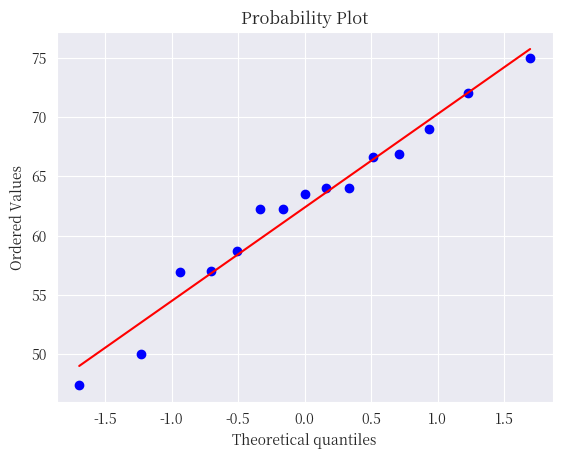

In [22]:
weights = [75.0, 64.0, 47.4, 66.9, 62.2, 62.2, 58.7, 63.5,66.6, 
                               64.0, 57.0, 69.0, 56.9, 50.0, 72.]
#利用Scipy绘制QQ图
st.probplot(weights,plot=plt)
plt.show()

- #### QQ 图数据生成原理


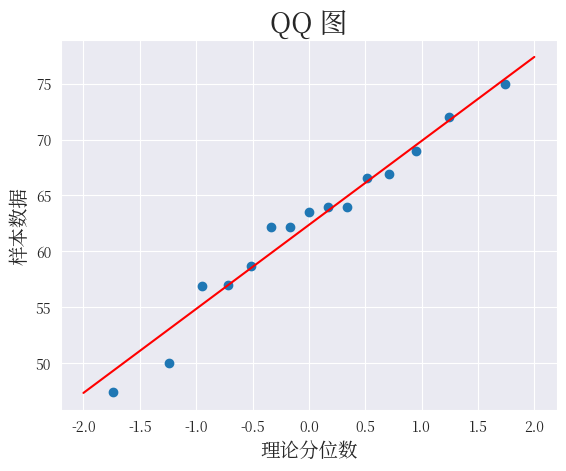

In [23]:
# 手工计算 QQ 图
import scipy.special as ss

x = weights
n = len(x)  # 此处使用排序后的weights即前面的x
phi = np.zeros(n)
x = sorted(x)

# 计算数据的标准正态分布反函数值，公式见下图
for i in range(1, n + 1):
    # ndtri 函数计算标准正态分布函数的反函数（注意是分布函数的反函数，不是密度函数的反函数）
    phi[i - 1] = ss.ndtri((i - 0.375) / (n + 0.25))
# 画出 QQ 散点图
plt.scatter(phi, x)

# 绘制 QQ 线图
q_std = st.tstd(x)  # 使用标准差的无偏估计
q_mean = np.mean(x)
qx = np.arange(-2, 3)
qy = q_std*qx + q_mean  # y = std*x + mu
plt.xlabel("理论分位数", size=14)
plt.ylabel("样本数据", size=14)
plt.title("QQ 图", size=20)
plt.plot(qx, qy, color='r')
plt.show()

In [24]:
'''茎叶图
用于直观展现数据分布的结构：竖线左边是十位数，右边是个位数
'''
from itertools import groupby
# 某课程的考试分数
scores = np.array([25, 45, 50, 54, 55, 61, 64, 68, 72, 75, 75,
                   78, 79, 81, 83, 84, 84, 84, 85, 86, 86, 86,
                   87, 89, 89, 89, 90, 91, 91, 92, 100])

# g 中存储分组之后的数据（如：25；45；50，54，55；61，64，68...）
for k, g in groupby(sorted(scores), key=lambda x: x//10):
    l = map(str, [int(_) % 10 for _ in list(g)])
    print(k,'|',' '.join(l))
    

2 | 5
4 | 5
5 | 0 4 5
6 | 1 4 8
7 | 2 5 5 8 9
8 | 1 3 4 4 4 5 6 6 6 7 9 9 9
9 | 0 1 1 2
10 | 0


-------------------

## 1.5  多元数据的数据特征与相关性分析

### 1.5.1 二元数据的数字特征

- #### 示例：

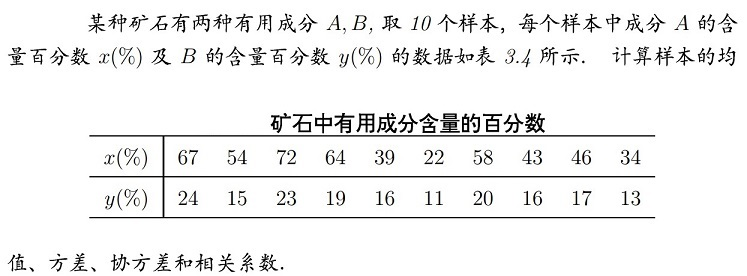

In [25]:
# 矿石数据分析
x = np.array([67, 54, 72, 64, 39, 22, 58, 43, 46, 34])
y = np.array([24, 15, 23, 19, 16, 11, 20, 16, 17, 13])

# 将数据合并,合并成列向量。
data = np.c_[x,y]  # 此函数比较常用

print('矿石数据：\n',data)

# 两种成分的均值，注意mean函数的axis参数指定计算哪个轴方向，此处为列向量。
print('\n矿石两种有用成分百分比：\n', pd.DataFrame(np.mean(data, axis=0),
                                               index=['x','y'],
                                               columns=['均值']))
# 协方差矩阵与相关系数矩阵
print('\n两种成分的协方差矩阵：\n', pd.DataFrame(np.round(np.cov(data.T), 2),
                                             index=['x','y'],
                                             columns=['x','y']))
print('\n两种成分的相关系数矩阵：\n', pd.DataFrame(np.round(np.corrcoef(data.T), 2),
                                               index=['x','y'],
                                               columns=['x','y']))

矿石数据：
 [[67 24]
 [54 15]
 [72 23]
 [64 19]
 [39 16]
 [22 11]
 [58 20]
 [43 16]
 [46 17]
 [34 13]]

矿石两种有用成分百分比：
      均值
x  49.9
y  17.4

两种成分的协方差矩阵：
         x      y
x  252.77  60.60
y   60.60  17.16

两种成分的相关系数矩阵：
       x     y
x  1.00  0.92
y  0.92  1.00


In [26]:
'''对矿石两种成分之间的相关性检验，分析两种成分之间是否有相关性。
对于数据的检验，在《第3章: 假设检验》进行重点讲解。

注意 pearsonr 检验的原假设是数据产生自不相关的数据集
很显然，p 值远小于 0.05，可以拒绝接受不是产生自同一个数据集的原假设。
二者之间的相关系数等于: 0.92，和前面相关系数矩阵的计算结果一致。
注意data的取值，取列向量进行计算。
'''

print('矿石有用成分之间有无关联性(pearsonr 函数)：',st.pearsonr(data[:, 0],data[:, 1]))

# spearmanr 函数无需假设数据服从正态分布，是一种典型的非参检验，原假设为数据不相关
print('\n矿石有用成分之间有无关联性(spearmanr):',st.spearmanr(data[:, 0],data[:, 1]))

# kendalltau 也是一种非参检验；原假设为数据不相关
print('\n矿石有用成分之间有无关联性(kendalltau):',st.kendalltau(data[:, 0],data[:, 1]))

矿石有用成分之间有无关联性(pearsonr 函数)： PearsonRResult(statistic=0.9202595441018039, pvalue=0.0001605157958250389)

矿石有用成分之间有无关联性(spearmanr): SignificanceResult(statistic=0.8997002046464955, pvalue=0.00039167359562948393)

矿石有用成分之间有无关联性(kendalltau): SignificanceResult(statistic=0.764093177458341, pvalue=0.002263469812035174)


In [27]:
# 测试两种不同分布的数据是否相关。
a = st.t.rvs(size=10, df=3)
b = st.f.rvs(size=10, dfn=10, dfd=9)
st.kendalltau(a,b)  # 结果很显然不能拒绝不相关的原假设。p-value > 0.05

SignificanceResult(statistic=-0.19999999999999998, pvalue=0.4843127204585538)

### 1.5.2 多元数据的数字特征


- #### 示例：
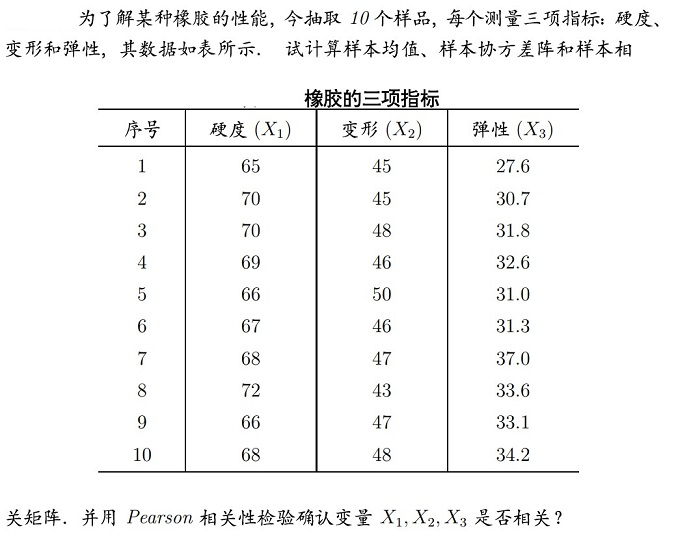

In [28]:
"""多元数据的数字特征。
"""
###x1,x2,x3分别代表橡胶的硬度、变形与弹性
x1 = np.array([65, 70, 70, 69, 66, 67, 68, 72, 66, 68])
x2 = np.array([45, 45, 48, 46, 50, 46, 47, 43, 47, 48])
x3 = np.array([27.6, 30.7, 31.8, 32.6, 31.0, 31.3, 37.0, 33.6, 33.1, 34.2])
data = np.c_[x1, x2, x3]

# 协方差矩阵
print("3项指标的协方差矩阵：\n",pd.DataFrame(np.round(np.cov(data.T),2),
                                          index=["硬度","变形","弹性"],
                                          columns=["硬度","变形","弹性"]))
# 相关系数矩阵
print("\n3项指标的相关系数矩阵：\n",pd.DataFrame(np.round(np.corrcoef(data.T),2),
                                             index=["硬度","变形","弹性"],
                                             columns=["硬度","变形","弹性"]))


3项指标的协方差矩阵：
       硬度    变形    弹性
硬度  4.77 -1.94  1.93
变形 -1.94  3.83  0.62
弹性  1.93  0.62  6.19

3项指标的相关系数矩阵：
       硬度    变形    弹性
硬度  1.00 -0.45  0.36
变形 -0.45  1.00  0.13
弹性  0.36  0.13  1.00


In [29]:
print('橡胶的硬度和变形之间有无关联性(pearsonr函数)：',st.pearsonr(data[:,0],data[:,1]))
print('\n橡胶的硬度和弹性之间有无关联性(pearsonr函数)：',st.pearsonr(data[:,0],data[:,2]))
print('\n橡胶的变形和弹性之间有无关联性(pearsonr函数)：',st.pearsonr(data[:,1],data[:,2]))

橡胶的硬度和变形之间有无关联性(pearsonr函数)： PearsonRResult(statistic=-0.4548831555240915, pvalue=0.18653609957909673)

橡胶的硬度和弹性之间有无关联性(pearsonr函数)： PearsonRResult(statistic=0.35612908480948774, pvalue=0.31247913405457856)

橡胶的变形和弹性之间有无关联性(pearsonr函数)： PearsonRResult(statistic=0.12659622460695796, pvalue=0.7274664789312599)


-------------------

## 1.6  多元数据的基本图形表示

- #### 示例：
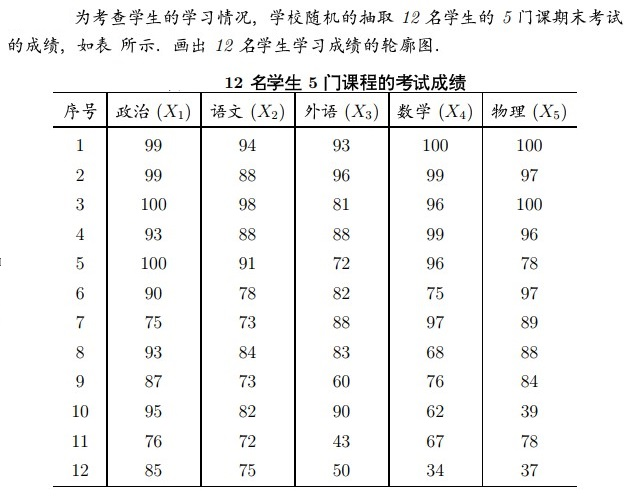

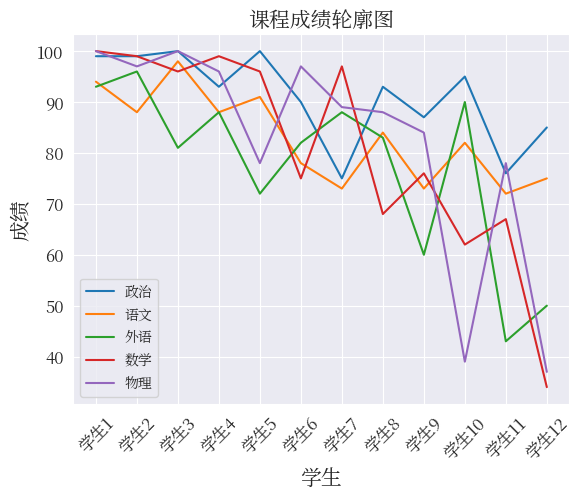

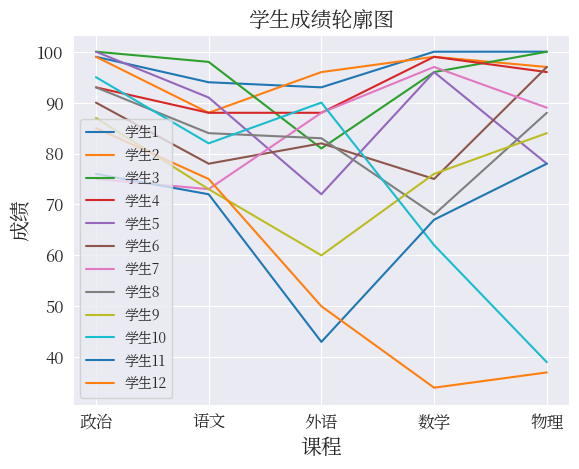

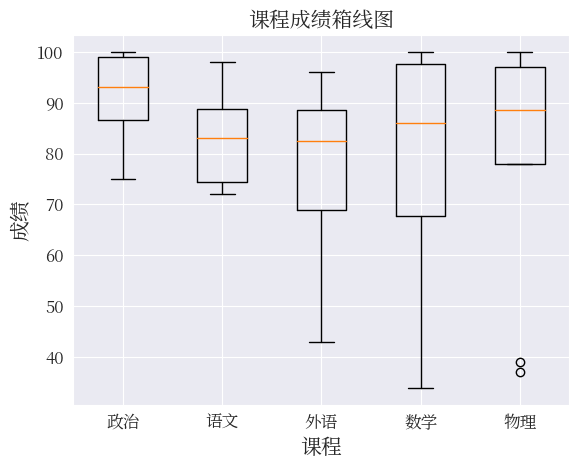

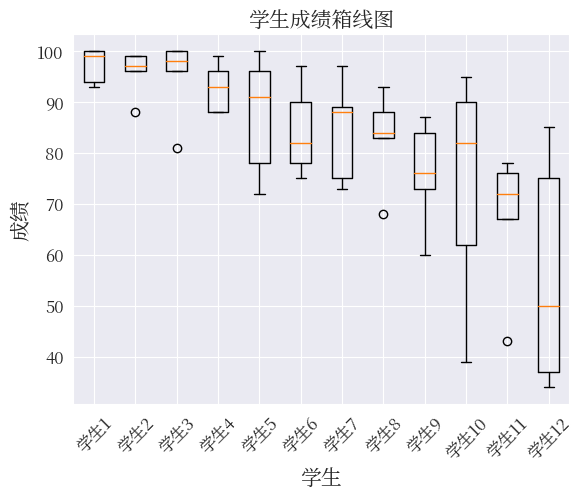

In [30]:
#学生成绩，Xn代表某一门课所有抽样学生的成绩。
X1=[99, 99, 100, 93, 100, 90, 75, 93, 87, 95, 76, 85]#政治
X2=[94, 88, 98, 88, 91, 78, 73, 84, 73, 82, 72, 75]#语文
X3=[93, 96, 81, 88, 72, 82, 88, 83, 60, 90, 43, 50]#外语
X4=[100, 99, 96, 99, 96, 75, 97, 68, 76, 62, 67, 34]#数学
X5=[100, 97, 100, 96, 78, 97, 89, 88, 84, 39, 78, 37]#物理
scores = np.c_[X1, X2, X3, X4, X5]
# plt.polar(scores)

# 课程的轮廓图，看各课程的成绩波动性
plt.figure()
plt.xlabel("学生", size=15)
plt.ylabel("成绩", size=15)
plt.title("课程成绩轮廓图", size=15)
# 课程表
courses = np.array(["政治", "语文", "外语", "数学", "物理"])
# 画出每门课的轮廓线
for i in np.arange(0, scores.shape[1]):  # shape[1]: 列数
    plt.plot(np.arange(1, scores.shape[0]+1),  # x ∈ [1, 13)
             scores[:, i], 
             label=courses[i])  
    plt.legend()
plt.xticks(np.arange(1, scores.shape[0]+1),
           ["学生" + str(i+1) for i in np.arange(0, scores.shape[0])])
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

#学生轮廓图，看各学生成绩波动性
plt.figure()
plt.xlabel("课程", size=15)
plt.ylabel("成绩", size=15)
plt.title("学生成绩轮廓图", size=15)
#画出每个学生的轮廓线
for i in np.arange(0, scores.shape[0]):
    plt.plot(np.arange(1, scores.shape[1]+1), scores[i, :], label="学生" + str(i+1))
    plt.legend(loc=3)  # 左下角
plt.yticks(size=12)
plt.xticks(np.arange(1, scores.shape[1]+1), courses, size=12 )

#课程成绩箱线图
plt.figure() 
plt.xlabel("课程", size=15)
plt.ylabel("成绩", size=15)
plt.title("课程成绩箱线图", size=15)
plt.boxplot(scores)#以列向量作为对象，即成绩为x轴

plt.xticks(np.arange(1, scores.shape[1]+1), courses, size=12)
plt.yticks(size=12)

#学生成绩箱线图
plt.figure() 
plt.xlabel("学生", size=15)
plt.ylabel("成绩", size=15)
plt.title("学生成绩箱线图", size=15)
plt.boxplot(scores.T)#转置之后即以学生为x轴
plt.xticks(np.arange(1, scores.shape[0]+1))
plt.xticks(np.arange(1, scores.shape[0]+1),
           ["学生" + str(i+1) for i in np.arange(0,scores.shape[0])])
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.show()

-----------------------